In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

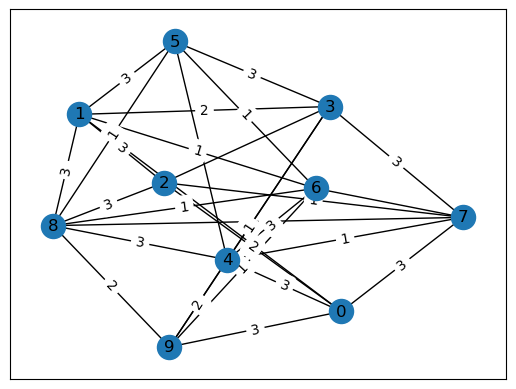

In [54]:
# RANDOM GRAPH
N=10
G = nx.path_graph(N)

p = 0.3
for i in range(N):
	for j in range(N):
		if i != j and np.random.rand() < p:
			G.add_edge(i, j, weight=np.random.choice([1, 2, 3]))

pos = nx.spring_layout(G)
nx.draw_networkx(G, with_labels=True, pos=pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

## Degree Centrality

In [56]:
G.degree[0]

5

## Inbetweenness

Defined as all the shortest length paths between

$$bc(v) = \sum_{s, t \in V} \frac{\sigma(s, t | v)}{\sigma(s, t)},$$
- $s, t$ are nodes we are looping over
- $v$ is the node of interest
- $\sigma$ is the number of shortest paths...


Various ways of finding $\sigma$. Dijkstra's, A*, Bellman Ford (I believe a matrix version of Dijkstra's). Dijkstra's only chooses edges with minimal cost.

In [57]:
# Implementation of the expression above
path = dict(nx.all_pairs_dijkstra_path(G))

v = 0
bc = 0
tot = 0
for s in G.nodes:
	for t in G.nodes:
		if s != v and t != v and s != t:
			all_paths = nx.all_simple_paths(G, source=s, target=t)
			local_tot = 0
			local_bc = 0
			for path in all_paths:
				if v in path:
					local_bc += 1
				tot += 1
			bc += local_bc
			tot += local_tot

bc /= tot
bc

0.7720780851903686

## Pagerank

Note that this is for digraphs.
Basically a variation of:

$$ Ax = \lambda x $$
- $\lambda = 1$ since we want the values when it converges towards infinity
- $A$ is the influence/reference matrix, which is just a weighted adjacency matrix (directed edges are weighted).

Solve for eigenvector:
$$ (A-I)x = 0 $$
And use matrix operations
OR you can separate A into a diagonalizable matrix

$$ A = PDP^{-1}$$



In [58]:
nx.adjacency_matrix(G).todense()

array([[0, 1, 2, 0, 3, 0, 0, 3, 0, 3],
       [1, 0, 3, 2, 0, 3, 1, 0, 3, 0],
       [2, 3, 0, 1, 0, 0, 0, 1, 3, 0],
       [0, 2, 1, 0, 1, 3, 0, 3, 0, 1],
       [3, 0, 0, 1, 0, 1, 3, 1, 3, 2],
       [0, 3, 0, 3, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 3, 1, 0, 1, 1, 1],
       [3, 0, 1, 3, 1, 0, 1, 0, 1, 0],
       [0, 3, 3, 0, 3, 1, 1, 1, 0, 2],
       [3, 0, 0, 1, 2, 0, 1, 0, 2, 0]])

In [59]:
# networkx already does the heavy lifting here
nx.adjacency_spectrum(G, weight='weight')

array([11.31783069+0.j, -7.50224119+0.j,  4.42105089+0.j,  2.15235201+0.j,
        2.37855439+0.j, -0.25174543+0.j, -1.71781722+0.j, -2.58218064+0.j,
       -4.52957241+0.j, -3.68623109+0.j])

## My own

Like what tells people how important is this person in a group? Frequency of contact? Influential ideas? Respect metric?

- Pagerank is building an influence graph, which is great for ideas and papers.
- Degree centrality (Modern social media) is a metric of number of connections. This is not a great solution for measuring "how important someone is in your life." For example, Justin Bieber is not important most people's life
- Frequency of contact (tie strength or weighted edges). This is arguably the most best metric of how important this node is in your life. There is the edge case where people tend to invite trouble and frequently contact with them for a while - these are necessary. However, I am assuming we are rational and would just leave the person if they do not bring value in our lives.
	- to refine this, perhaps it should be more of a "desire to return to contact with person" metric.
		- frequency of contact + initial choices

It's rather hard to pinpoint one singular metric. Rather people are important for different metrics. For example, Bob Dylan is important for his influential ideas. Taylor Swift is important for respect. Your boss is important in your life because of frequency of contact. Each of these figures you'd place with some importance.

How would we then define a measure of "importance" within a finite social group. In other words, what metrics within a graph would be necessary to define importance within one's life.

For me importance ~ socially dominant (of a social group).

### Importance metric

Okay problems with the frequency metric. Socially dominant figures don't talk to everyone in a social group.

Okay it should maybe be the frequency of contact factored into page rank.
- high frequency of contact can be isolated within subgroups, so page rank takes care of filtering those out.

Intuitively, I'm thinking literary references, where works of Shakespeare and Homer are referenced throughout history, making them important works. These references trickle down to other works when others reference books that references these important authors.

STUDY THIS A BIT MORE?? 

### How can I do this with directed graphs.

I want to limit the power of parasocial relationships. It's not entirely healthy to have your only friendgroup be the Kardashians.

#### Using frequency matrix to identify clusters

I think there are some hidden structures that can be uncovered with these frequency matrices.

Where the edge weights are determined by frequency. This is rather hard. Some variated nuances here.

$$ w_f = ...$$

^^^ figure this out later
- number of interactions
- number of clicks

These are all imperfect measures of the psyche's evaluation